
# Clustering

---
> Author: Dr. Fadoua Ouamani


---



In [ ]:
#Getting set up
import pandas as pd #to handle the data frame
from sklearn.impute import SimpleImputer #to impute the missing values
from sklearn.preprocessing import OneHotEncoder # binarisation of the categorical attributes
from sklearn.preprocessing import StandardScaler #implements the z-score
from sklearn.decomposition import PCA #for dimensionality reduction after the transformations made
from sklearn import metrics #to evaluate the quality of clustering
import numpy as np #to convert the dataframe into muldimensional arrays and work with
import matplotlib.pyplot as plt #for plotting and visualization
import sklearn.cluster as cluster #Sklearn has 13 clustering algorithms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data
tayou_df = pd.read_csv('/content/drive/MyDrive/big data/tayou.csv')

In [ ]:
tayou_df


,Personality,Collector,Age,ZodiacSign,FavLg,GStat,GMath,GOOP,GEnglish,LearnNSkill,Gender
0,Lion,No,24,Libra,English,15.0,15.00,15.0,18.00,No,M
1,Otter,No,23,Pisces,French,NaN,NaN,NaN,NaN,No,M
2,Lion,No,23,Leo,English,10.0,10.00,13.0,13.00,Yes,M
3,Lion,No,22,Scorpio,English,14.0,12.00,17.0,15.00,Yes,F
4,Lion,No,23,Leo,French,18.0,18.15,16.0,15.00,Yes,F
...,...,...,...,...,...,...,...,...,...,...,...
97,Beaver,No,23,Capricorn,English,13.0,15.00,16.0,14.00,Yes,M
98,Lion,No,22,Scorpio,French,14.0,15.00,14.0,14.33,Yes,F
99,Golden retriever,No,24,Virgo,Italian,16.0,17.00,12.0,13.00,No,M
100,Beaver,No,23,Pisces,French,14.0,15.00,13.0,12.00,Yes,F


In [ ]:
#Seperating the data
# Categorical variables to use
cat_vars = ["Personality", "Collector", "ZodiacSign", "FavLg", "LearnNSkill", "Gender"]

# Numerical Variables to use
num_vars = ['Age', 'GStat', 'GMath', 'GOOP', 'GEnglish']

In [ ]:
#Preparing the data
#filling in the missing values
num_imputer = SimpleImputer(strategy="mean")
preprocess_num = tayou_df[num_vars].to_numpy()
preprocess_num=num_imputer.fit_transform(preprocess_num)
cat_imputer = SimpleImputer(strategy="most_frequent")
preprocess_cat = tayou_df[cat_vars].to_numpy()
preprocess_cat=cat_imputer.fit_transform(preprocess_cat)
#Handling categorical variables
cat_encoder = OneHotEncoder()
preprocess_cat = cat_encoder.fit_transform(preprocess_cat)
preprocess_cat = preprocess_cat.toarray()
print(preprocess_cat)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [ ]:
#Normalizing numerical data
preprocess_num=StandardScaler().fit_transform(preprocess_num)
print (preprocess_num)

[[ 6.65966691e-01  4.23710132e-01  5.50537517e-01  1.56963913e-01
   1.78495672e+00]
 [-1.23900780e-01  7.28229468e-16 -1.63522578e-15 -1.00189023e-15
  -8.20256887e-16]
 [-1.23900780e-01 -1.62607359e+00 -1.75083818e+00 -9.71064207e-01
  -5.23861157e-01]
 [-9.13768250e-01  1.37533876e-02 -8.30287901e-01  1.28499203e+00
   3.99665995e-01]
 [-1.23900780e-01  1.65358037e+00  2.00040421e+00  7.20977973e-01
   3.99665995e-01]
 [-1.23900780e-01  1.03864525e+00 -7.38232873e-01 -6.21375490e-01
   1.68784207e-01]
 [-1.23900780e-01  4.23710132e-01  1.33300525e+00  1.00298500e+00
  -2.92979369e-01]
 [ 6.65966691e-01  7.28229468e-16 -1.63522578e-15 -1.00189023e-15
  -8.20256887e-16]
 [-1.23900780e-01  8.33666877e-01  5.50537517e-01 -4.07050147e-01
  -1.44738831e+00]
 [-1.23900780e-01  8.25467742e-01  9.02623773e-02  1.45683632e-01
   2.38048744e-01]
 [ 6.65966691e-01 -3.96203357e-01  9.02623773e-02 -9.71064207e-01
  -9.85624734e-01]
 [ 6.65966691e-01 -8.06160102e-01  1.01081266e+00  7.20977973e-01

In [ ]:
tayou_preprocessed=np.column_stack((preprocess_cat, preprocess_num)) #to concatenate the ndarrays into one
tayou_preprocessed.shape #checking the transformed data shape

(102, 36)

In [ ]:
#Dimensionlaity reduction with PCA
pca = PCA(36, svd_solver="covariance_eigh")
tayou_reduced = pca.fit_transform(tayou_preprocessed)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[1.99998468e-01 1.38170593e-01 1.21949588e-01 9.97525640e-02
 8.06673027e-02 6.01146667e-02 4.66168349e-02 3.83785223e-02
 2.99003765e-02 2.62017074e-02 2.33683664e-02 1.52959527e-02
 1.28227009e-02 1.19577548e-02 1.14747544e-02 1.03980670e-02
 1.03168043e-02 9.07633810e-03 8.82148281e-03 8.26897052e-03
 7.60126493e-03 6.60883462e-03 6.10979151e-03 4.65401825e-03
 4.22644953e-03 2.96604550e-03 1.44752412e-03 1.11150173e-03
 8.69052440e-04 8.53703177e-04 5.19595749e-17 1.96493642e-17
 1.10537327e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[1.30371517e+01 1.08362046e+01 1.01802761e+01 9.20728146e+00
 8.27976773e+00 7.14758959e+00 6.29420346e+00 5.71101775e+00
 5.04089573e+00 4.71882837e+00 4.45639381e+00 3.60543484e+00
 3.30110351e+00 3.18782306e+00 3.12277781e+00 2.97266309e+00
 2.96102437e+00 2.77731231e+00 2.73804248e+00 2.65091076e+00
 2.54162996e+00 2.36990986e+00 2.27867602e+00 1.98876481e+00
 1.89520952e+00 1.58766288e+00 1.10912958e+00 9.71906433e-01
 8.59394119e-01 8.51770

In [ ]:
#checking the reduced data shape
tayou_reduced=tayou_reduced[:,:2]
tayou_reduced.shape

(102, 2)

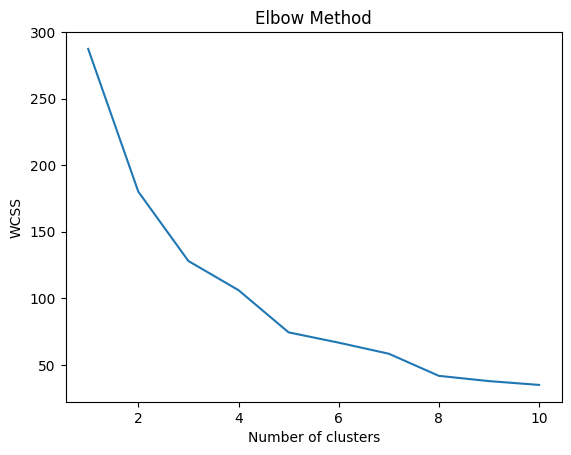

In [ ]:
#Kmeans
#finidng the best k, number of clusters
#first method, elbow method
wcss = [] #initializing the variable that will contain the Within Cluster Sum of Squares computed at each iteration (The Y-axis of the curve)
max_clusters = min(10, len(tayou_reduced))
for i in range(1, max_clusters + 1): #to run the kmeans for different cluster numbers ranging from 1 to 10 (The X-axis of the curve)
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tayou_reduced)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, max_clusters + 1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Interpretations:**

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) decreasing as the number of clusters increases. Here is an interpretation of the graph:

1.  **Initial Steep Drop (1 to 3 clusters):** There is a significant drop in WCSS between 1 and 3 clusters, indicating that adding clusters up to 3 significantly improves the clustering quality and reduces the overall variance within the clusters.

1.  **Gradual Decrease (4 to 6 clusters):** After 3 clusters, the decrease in WCSS becomes more gradual. This suggests that adding more clusters continues to reduce the WCSS but at a slower rate. The "elbow" is typically where this transition happens.

3.  **Flattening (Beyond 6 clusters):** Beyond 6 clusters, the WCSS continues to decrease but with much smaller gains. This flattening indicates that additional clusters contribute less to the overall clustering quality.

**Optimal Number of Clusters:** The "elbow" or inflection point appears around 3 to 5 clusters, where the reduction in WCSS starts to taper off. This is where you should consider setting the number of clusters for KMeans, as it represents a balance between clustering complexity and performance.

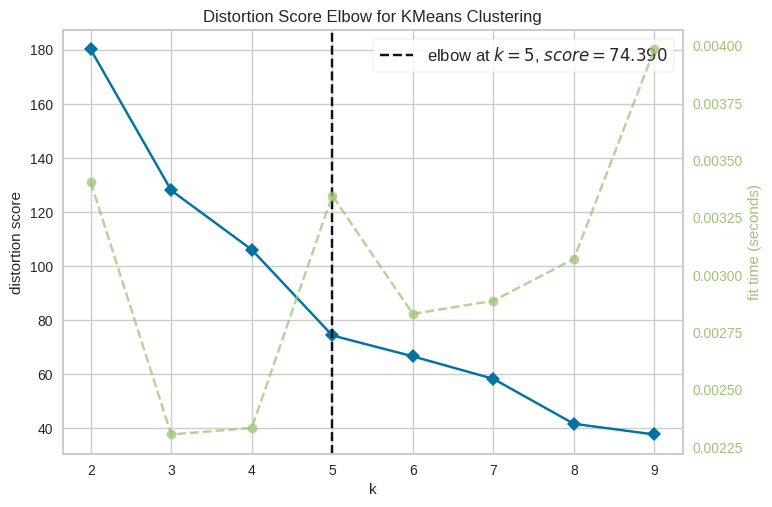

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Kmeans
#finidng the best k, number of clusters
#first method, elbow method, second version with an indication
from yellowbrick.cluster import KElbowVisualizer
model = cluster.KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(tayou_reduced)
visualizer.show()

**Interpretations:**

The updated Elbow Method visualization from Yellowbrick provides an enhanced way to determine the optimal number of clusters for your KMeans model. Here's how to interpret it:

1.  **Optimal Number of Clusters (k):** The plot indicates that the "elbow" occurs at k = 5, with a score of approximately 74.39. This suggests that 5 clusters is the most appropriate choice for this dataset, balancing cluster cohesion and separation.

2.  **Distortion Score:** This score represents how compact the clusters are, with lower values indicating tighter, more compact clusters. The graph shows that beyond 5 clusters, the reduction in the distortion score flattens, which means that adding more clusters yields diminishing returns in terms of improving cluster quality.

3.  **Visual Confirmation:** The vertical dashed line and the marked point at k = 5 provide clear visual evidence of the elbow, making it easier to choose the number of clusters.

**Conclusion:** The best number of clusters for your KMeans clustering, according to this visualization, is 5. You should proceed with setting n_clusters=5 for your final clustering model to see how the data is segmented and analyze the characteristics of each cluster.

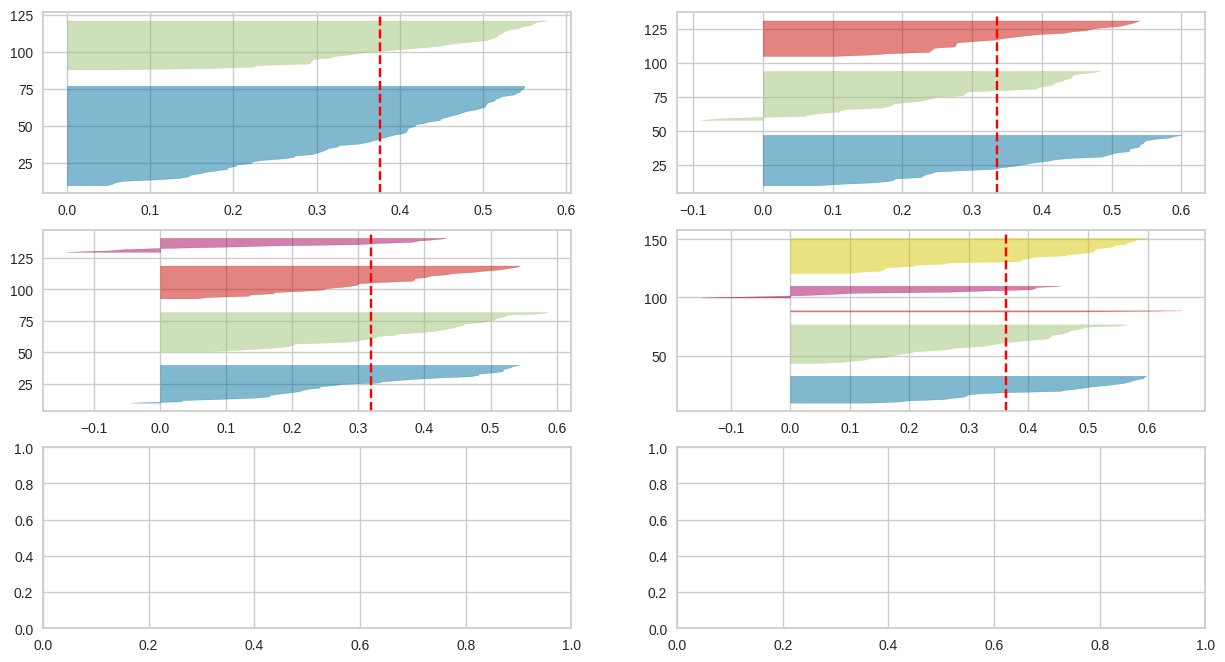

In [ ]:
#Kmeans
#finidng the best k, number of clusters
#second method, silhouette coefficient
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
#Create KMeans instances for different number of clusters
  km = cluster.KMeans(n_clusters=i, random_state=42)
  q, mod = divmod(i, 2)
#Create SilhouetteVisualizer instance with KMeans instance
#Fit the visualizer
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(tayou_reduced)

**Interpretations:**

The Silhouette Coefficient visualization for different numbers of clusters helps assess the quality of clustering.

1. **Silhouette Score Overview**:
   - The silhouette score ranges from -1 to 1, where:
     - **1** indicates that clusters are well-separated and clearly defined.
     - **0** indicates that clusters are overlapping.
     - **Negative values** indicate that some points may be assigned to the wrong cluster.
   - The red dashed line represents the average silhouette score for each clustering solution.

2. **Interpretation of Each Plot**:
   - **k = 2**: The silhouette plot shows broad and well-defined clusters. The average silhouette score is relatively high, suggesting that using 2 clusters results in well-separated groups.
   - **k = 3**: The silhouette plot displays good cohesion, with most samples showing positive scores. The average silhouette score is decent, indicating that 3 clusters could be a reasonable choice.
   - **k = 4**: The silhouette plot shows varied cluster widths, with some clusters being narrower. The average silhouette score remains positive, indicating acceptable clustering but slightly more variation in quality across clusters.
   - **k = 5**: The silhouette plot is slightly more complex, with some clusters showing more uniformity than others. The average silhouette score is still positive, indicating that 5 clusters are feasible but with slightly less overall cohesion compared to 2 or 3 clusters.

3. **Best Choice for Clusters**:
   - **k = 2** and **k = 3** have the highest average silhouette scores and show consistent, well-defined clusters.
   - **k = 5** has a positive silhouette score but appears more complex, with some clusters showing lower silhouette values. This could indicate that while 5 clusters are still valid, they may not be as cohesive as fewer clusters.

**Conclusion**:
- If we are aiming for simplicity and better-separated clusters, **k = 2** or **k = 3** could be optimal choices.
- If we want to explore more nuanced clustering and can accept slightly less cohesion, **k = 5** is also an option based on the results of the Elbow Method you previously shared.

It would be beneficial to further analyze the characteristics of the clusters for each `k` to make an informed final decision.



In [ ]:
#Initialize the class object
kmeans = cluster.KMeans(n_clusters= 3, random_state=42)

#predict the labels of clusters.
label = kmeans.fit_predict(tayou_reduced)

print(label)

[1 0 2 1 1 1 1 0 0 1 0 1 0 1 0 2 1 2 0 0 1 2 2 2 2 0 0 0 0 0 0 1 2 1 0 2 0
 1 0 1 1 2 2 0 0 1 2 2 2 0 0 0 0 2 1 0 2 1 1 0 2 1 1 2 1 2 0 2 2 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 2 2 0 2 1 2 2 2 1 0 0 0 1]


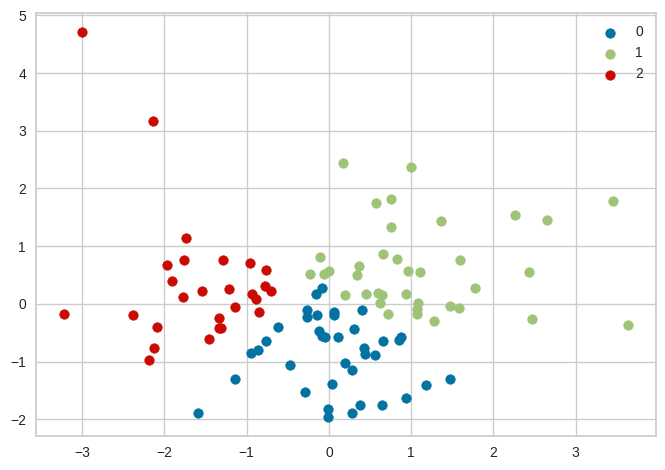

In [ ]:
#Plotting the clusters
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(tayou_reduced[label == i , 0] , tayou_reduced[label == i , 1] , label = i)
plt.legend()
plt.show()

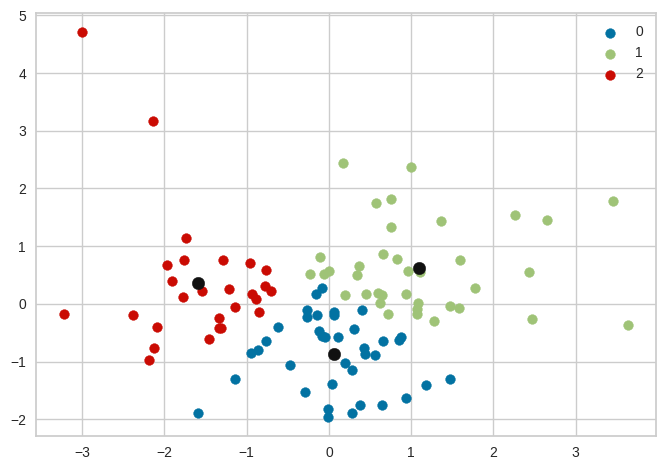

In [ ]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(tayou_reduced[label == i , 0] , tayou_reduced[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
#evaluation of the clustering
print(f"Silhouette Coefficient for kmeans: {metrics.silhouette_score(tayou_reduced, label):.3f}")

Silhouette Coefficient for kmeans: 0.336


Here's an interpretation of the clustering approaches and plots you've provided:

### 1. **KMeans Clustering (3 clusters)**

- **Visualization**: The scatter plots show the distribution of data points across three clusters. Each color represents a different cluster, and the centroids are marked with black points in the second plot.
- **Evaluation**: The silhouette coefficient for KMeans clustering with three clusters is **0.336**, indicating moderately defined clusters with some overlap or variance in cluster compactness.


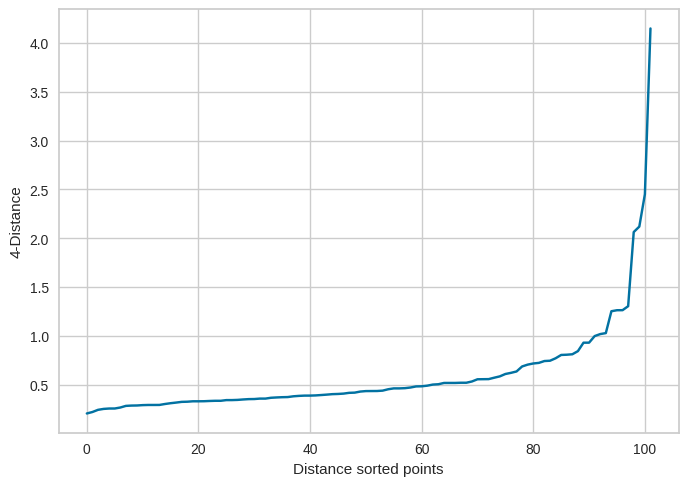

In [ ]:
#DBSCAN
#Finding the optimal parameters
# initialize the value of k for kNN which can be same as MinPts (rule of thumb: 2 * dimensionality of the data)
k = 4
# Compute k-nearest neighbors
# you need to add 1 to k as this function also return distance to itself
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=k+1).fit(tayou_reduced)

# get distances
dist, ind = nbrs.kneighbors(tayou_reduced)
#drop the first column, and sort distances in an ascending order
k_dist = np.sort(dist[:, -1])
#Plot the kNN graph with sorted distance,
plt.plot(k_dist)
plt.xlabel('Distance sorted points')
plt.ylabel(f'{k}-Distance')
plt.show()

In [ ]:
! pip install kneed
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.2537808505221304


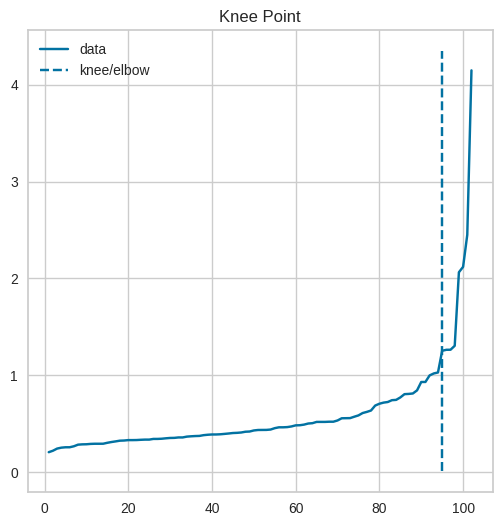

In [ ]:
kneedle.plot_knee()
plt.show()

In [ ]:
dbscan=cluster.DBSCAN(eps=1.25, min_samples=4, metric='euclidean')
label = dbscan.fit_predict(tayou_reduced)
print(label)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


### 2. **DBSCAN Clustering**
- **KNN Distance Plot**: The K-distance plot helps identify the optimal `eps` parameter for DBSCAN. The knee point found at approximately **1.25** suggests a reasonable choice for `eps`.


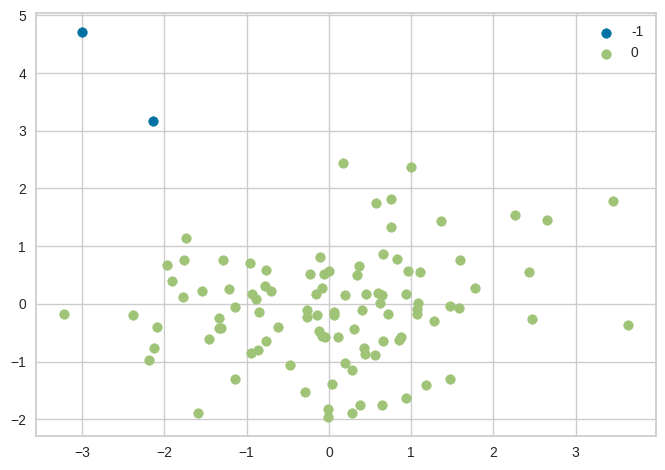

In [ ]:
#Plotting the clusters
#Getting unique labels
u_labels = np.unique(label)
#plotting the results:
for i in u_labels:
    plt.scatter(tayou_reduced[label == i , 0] , tayou_reduced[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#cluster evaluation
print(f"Silhouette Coefficient for DBSCAN: {metrics.silhouette_score(tayou_reduced, label):.3f}")

Silhouette Coefficient for DBSCAN: 0.600


- **DBSCAN Clustering Visualization**: The plot shows most data points grouped into one cluster (labeled `0`) and a few noise points (labeled `-1`).
- **Evaluation**: The silhouette coefficient for DBSCAN is **0.600**, indicating better-defined clusters compared to KMeans and suggesting that DBSCAN finds natural cluster boundaries more effectively.



In [ ]:
#Hierarchical clustering
#Agglomerative clustering
agglomerative = cluster.AgglomerativeClustering(n_clusters=3)
labels = agglomerative.fit_predict(tayou_reduced)
print(labels)

[2 1 0 1 2 1 1 1 1 1 0 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 2 1 0 1
 1 1 1 2 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 2 0 1 0 0 2 2 2 2 1
 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 0 0 0 0 1 0 0 0 1 1 1 1 1]


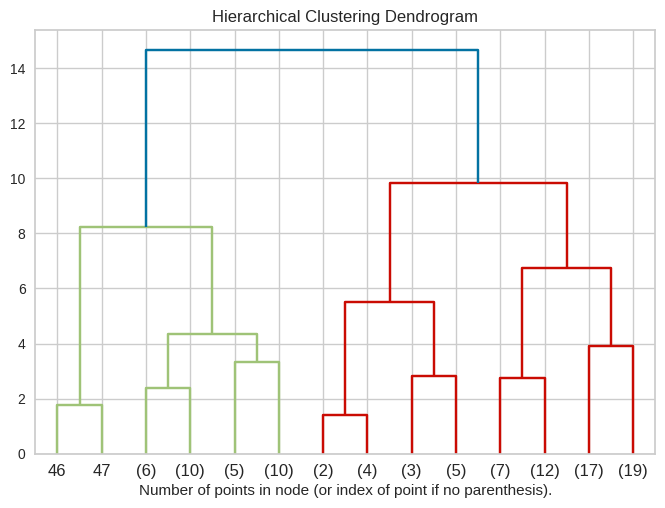

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
# setting distance_threshold=0 ensures we compute the full tree.
model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None) #Set the distance threshold or n_clusters

model = model.fit(tayou_reduced)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
#cluster evaluation
print(f"Silhouette Coefficient for agglomerative clustering: {metrics.silhouette_score(tayou_reduced, labels):.3f}")

Silhouette Coefficient for agglomerative clustering: 0.367


### 3. **Agglomerative Hierarchical Clustering**
- **Dendrogram**: The dendrogram visually represents the hierarchical relationships between data points and clusters. The branching structure shows how clusters merge as the distance threshold decreases.
- **Evaluation**: The silhouette coefficient for agglomerative clustering is **0.367**, slightly better than KMeans but lower than DBSCAN. This suggests agglomerative clustering achieves moderately distinct clusters.

### **Overall Interpretation**:
- **DBSCAN** achieved the highest silhouette score (**0.600**), indicating that it formed the most cohesive clusters, especially useful for data with irregular cluster shapes and noise.
- **Agglomerative clustering** came next with a score of **0.367**, showing slightly better-defined clusters than KMeans.
- **KMeans** had the lowest silhouette score (**0.336**), suggesting its clusters may be less distinct.

**Recommendation**: Considering the silhouette coefficients and visual interpretations, **DBSCAN** appears to be the most effective clustering method for this dataset, followed by **agglomerative clustering**. You could choose DBSCAN if your data naturally fits non-globular shapes or contains noise, while agglomerative clustering would be a good alternative for understanding hierarchical structures in the data.

**Exercice:**

Apply other clustering algorithms from sklearn stack of clusters and compare the results with the previous ones

Silhouette Coefficient for MeanShift: 0.363


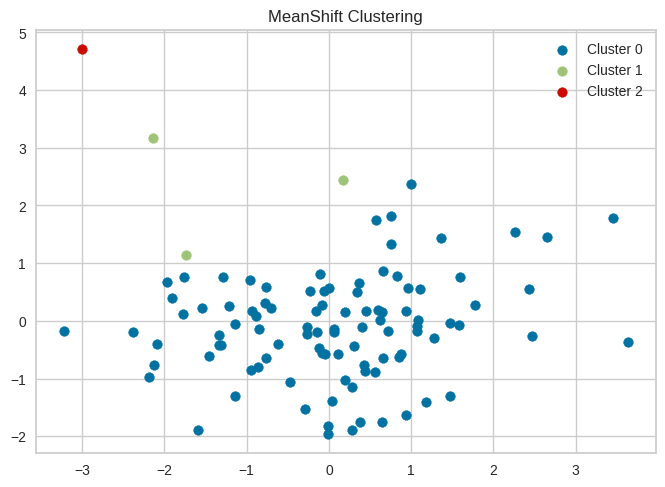

Silhouette Coefficient for Affinity Propagation: 0.361


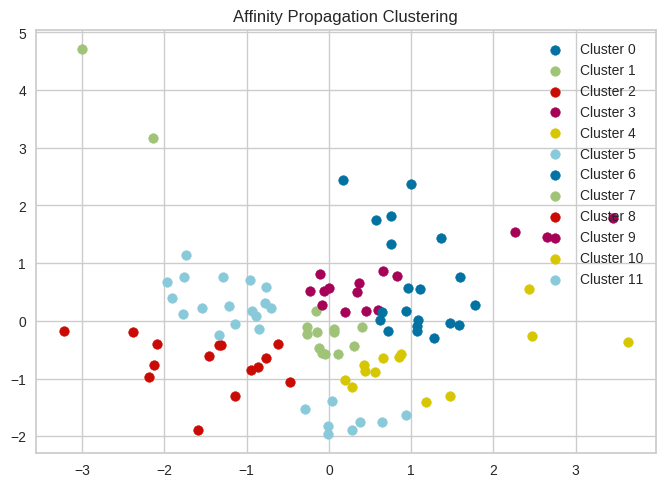

Silhouette Coefficient for Birch: 0.374


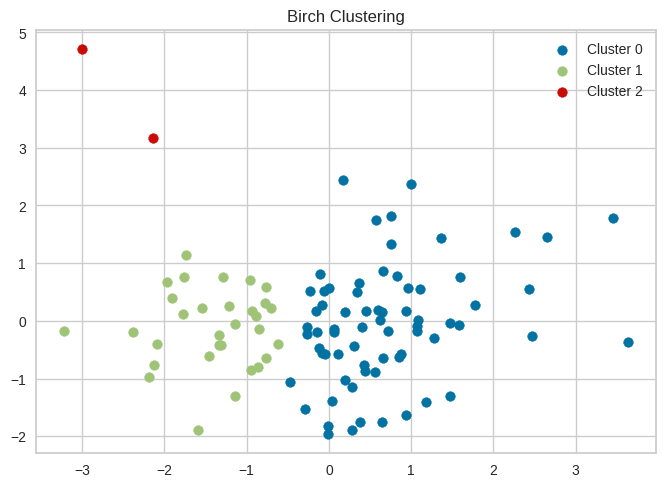

Silhouette Coefficient for Spectral Clustering: 0.324


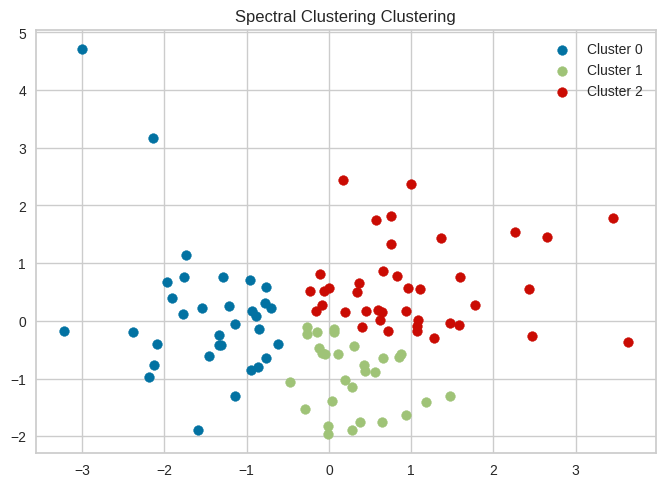

Silhouette Coefficient for OPTICS: -0.043


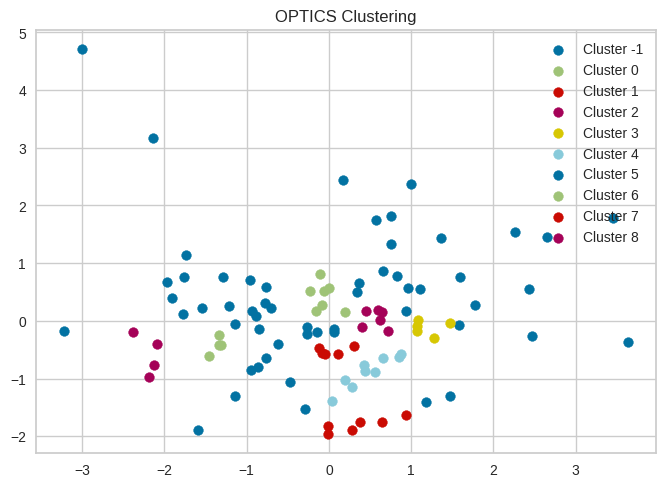

(array([-1, -1,  8, -1, -1,  0,  3,  0,  7,  2, -1, -1,  7,  3,  7,  6,  2,
         6,  4, -1, -1, -1,  5, -1,  5, -1,  4,  1, -1,  4,  1,  3,  8, -1,
         7,  6, -1,  2,  4, -1, -1,  8, -1, -1,  1,  3, -1, -1, -1,  1, -1,
        -1, -1, -1, -1, -1,  8, -1, -1,  4,  5,  0, -1, -1, -1,  5,  7, -1,
        -1, -1, -1, -1, -1,  2, -1, -1, -1,  4,  4,  1, -1, -1,  0, -1,  7,
         2,  0, -1,  0, -1, -1, -1,  5,  3, -1,  6, -1,  2,  4,  4, -1,  0]),
 -0.04273581275659002)

In [ ]:
from sklearn.cluster import MeanShift, AffinityPropagation, Birch, SpectralClustering, OPTICS
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Function to fit, predict, and evaluate clustering algorithms
def apply_and_evaluate_clustering(algorithm, data, name):
    labels = algorithm.fit_predict(data)
    silhouette = metrics.silhouette_score(data, labels)
    print(f"Silhouette Coefficient for {name}: {silhouette:.3f}")
    unique_labels = np.unique(labels)

    # Plotting the clusters
    for i in unique_labels:
        plt.scatter(data[labels == i, 0], data[labels == i, 1], label=f'Cluster {i}')
    plt.title(f'{name} Clustering')
    plt.legend()
    plt.show()

    return labels, silhouette

# Applying MeanShift
mean_shift = MeanShift()
apply_and_evaluate_clustering(mean_shift, tayou_reduced, "MeanShift")

# Applying Affinity Propagation
affinity_prop = AffinityPropagation(random_state=42)
apply_and_evaluate_clustering(affinity_prop, tayou_reduced, "Affinity Propagation")

# Applying Birch
birch = Birch(n_clusters=3)  # Change the number of clusters if needed
apply_and_evaluate_clustering(birch, tayou_reduced, "Birch")

# Applying Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42, affinity='nearest_neighbors')
apply_and_evaluate_clustering(spectral, tayou_reduced, "Spectral Clustering")

# Applying OPTICS
optics = OPTICS(min_samples=4, metric='euclidean')
apply_and_evaluate_clustering(optics, tayou_reduced, "OPTICS")


Here's an interpretation of the results for each clustering algorithm and its performance based on the silhouette scores:

### 1. **MeanShift Clustering**
- **Silhouette Coefficient**: 0.363
- **Interpretation**: The MeanShift algorithm produced clusters that are moderately well-defined, as indicated by the silhouette score. The plot shows distinct clusters, but some overlap or less cohesion may exist.
- **Visual Analysis**: The clustering structure suggests a main cluster with some smaller, isolated points.

### 2. **Affinity Propagation Clustering**
- **Silhouette Coefficient**: 0.361
- **Interpretation**: This algorithm formed a larger number of clusters (up to 12), as shown in the plot. The silhouette score is close to that of MeanShift, indicating moderately well-defined clusters but with a higher number of groups.
- **Visual Analysis**: The clusters are spread out with varying sizes, and some clusters might have overlapping areas.

### 3. **Birch Clustering**
- **Silhouette Coefficient**: 0.374
- **Interpretation**: Birch performed similarly to MeanShift but with a slightly better silhouette score. It formed three main clusters, showing a decent separation and compactness.
- **Visual Analysis**: The clusters appear reasonably distinct, with some well-separated groupings.

### 4. **Spectral Clustering**
- **Silhouette Coefficient**: 0.324
- **Interpretation**: The silhouette score is lower compared to the other algorithms. This indicates that Spectral Clustering may not have been as effective for this dataset, potentially due to the nature of the data or the chosen affinity method.
- **Visual Analysis**: The clusters formed by Spectral Clustering show some overlap and less-defined boundaries, leading to a lower score.

### 5. **OPTICS Clustering**
- **Silhouette Coefficient**: -0.043
- **Interpretation**: OPTICS has the lowest silhouette score and even a negative value, indicating that the clusters are poorly defined. This could be due to the data being interpreted as noise or difficulty in finding natural groupings with the chosen parameters.
- **Visual Analysis**: The plot shows several clusters with many points labeled as noise (`-1`), suggesting that OPTICS struggled to find cohesive clusters with the chosen settings.

### **Summary of Results**:
- **Best Performing Algorithm**: **Birch** clustering achieved the highest silhouette score of **0.374**, indicating relatively well-defined clusters compared to the other algorithms.
- **Moderate Performers**: **MeanShift** and **Affinity Propagation** also produced moderate silhouette scores (0.363 and 0.361, respectively), showing that they formed acceptable clusters but not as well as Birch.
- **Lower Performers**: **Spectral Clustering** and **OPTICS** did not perform as well, with silhouette scores of **0.324** and **-0.043**. Spectral Clustering showed less distinct clusters, while OPTICS detected many noise points and struggled with the dataset's structure.

**Recommendation**:
- If you are looking for a clustering method with decent performance, **Birch** is recommended based on these results.
- **MeanShift** and **Affinity Propagation** can also be considered for their potential to find non-globular clusters but may require parameter tuning for improved performance.
- **OPTICS** might need further parameter adjustment or may not be the best fit for this specific dataset structure.